# Projet 2 - 02 : EDA Notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import spearmanr, chi2_contingency, kruskal, normaltest
from sklearn import preprocessing, decomposition

sns.set()
# matplotlib settings
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 14})
# pandas settings
pd.set_option('display.float_format', lambda x: f'{x:.3f}')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

## Data import

In [2]:
data = pd.read_csv('cleaned_data.csv', sep='\t', low_memory=False)
print("{} rows / {} columns".format(data.shape[0], data.shape[1]))
data.head(3)

181861 rows / 30 columns


code     created_datetime last_modified_datetime  \
0  0000000001281  2018-02-05 11:40:01    2018-05-23 10:19:54   
1  0000000001885  2017-11-20 12:18:57    2018-02-08 21:48:11   
2  0000000005470  2017-11-27 10:34:20    2019-02-14 21:41:58   

         product_name quantity              brands  \
0  tarte noix de coco      NaN  crous resto',crous   
1    compote de poire      NaN               crous   
2    baguette bressan        1         crousresto'   

                                       categories_fr labels_fr countries_fr  \
0     tartes,tartes sucrées,tartes à la noix de coco       NaN       france   
1  aliments et boissons à base de végétaux,alimen...       NaN       france   
2  aliments et boissons à base de végétaux,alimen...       NaN       france   

                                    ingredients_text serving_size  \
0                                                NaN          NaN   
1                                                NaN          NaN   
2  bâguette bressan pain baguette 46,2%,' farine ...          NaN   

   serving_quantity  additives_n  \
0            56.000        1.000   
1            56.000        1.000   
2            56.000        3.000   

                                        additives_fr nutriscore_grade  \
0                                                NaN                d   
1                                                NaN                a   
2  e14xx - amidons modifiés,e262 - acétates de so...                a   

   nova_group          pnns_groups_1       pnns_groups_2  \
0         NaN          sugary snacks  biscuits and cakes   
1         NaN  fruits and vegetables              fruits   
2       4.000   cereals and potatoes               bread   

           main_category_fr  energy_kcal_100g  energy_100g  fat_100g  \
0  tartes à la noix de coco           381.000     1594.000    22.000   
1         compotes de poire           157.000      657.000     0.000   
2                 baguettes           160.000      669.000     2.200   

   saturated_fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
0              15.500              27.300       21.900       4.400   
1               0.000              36.000       27.000       3.600   
2               0.500              25.200        0.600       1.600   

   proteins_100g  salt_100g  sodium_100g  nutrition_score_100g  
0          4.600      0.100        0.040                14.000  
1          0.600      0.000        0.000                -2.000  
2          9.500      0.358        0.143                -4.000

In [3]:
data.set_index('code', inplace=True)

In [4]:
print(f"{data['main_category_fr'].nunique()} categories")

7636 categories


In [5]:
# parsing datetime
data['created_datetime'] = pd.to_datetime(data['created_datetime'], errors='coerce')
data['last_modified_datetime'] = pd.to_datetime(data['last_modified_datetime'], errors='coerce')
# nova_group = categorical variable
data['nova_group'] = data['nova_group'].astype(str)

### Numeric features distributions

In [6]:
data.describe()

serving_quantity  additives_n  energy_kcal_100g  energy_100g  \
count        181861.000   181861.000        181861.000   181861.000   
mean             69.019        1.611           243.560     1018.306   
std              44.603        1.888           166.129      694.899   
min               0.000        0.000             0.000        0.000   
25%              33.000        0.000            89.000      369.000   
50%              56.000        1.000           226.000      946.000   
75%              95.000        3.000           379.000     1586.000   
max             227.100        7.000           868.000     3632.000   

        fat_100g  saturated_fat_100g  carbohydrates_100g  sugars_100g  \
count 181861.000          181861.000          181861.000   181861.000   
mean       9.923               3.013              31.772       11.070   
std       11.331               4.092              26.694       13.498   
min        0.000               0.000               0.000        0.000   
25%        0.700               0.000               7.600        1.410   
50%        5.000               1.000              22.500        4.500   
75%       16.670               4.640              56.760       16.810   
max       51.000              16.670             100.000       53.400   

       fiber_100g  proteins_100g  salt_100g  sodium_100g  nutrition_score_100g  
count  181861.000     181861.000 181861.000   181861.000            181861.000  
mean        2.209          6.754      0.779        0.312                 6.483  
std         2.257          5.725      0.740        0.296                 8.687  
min         0.000          0.000      0.000        0.000               -15.000  
25%         0.000          2.000      0.100        0.040                -1.000  
50%         1.700          5.880      0.640        0.256                 5.000  
75%         3.600         10.000      1.210        0.484                13.000  
max         9.000         23.800      3.067        1.227                36.000

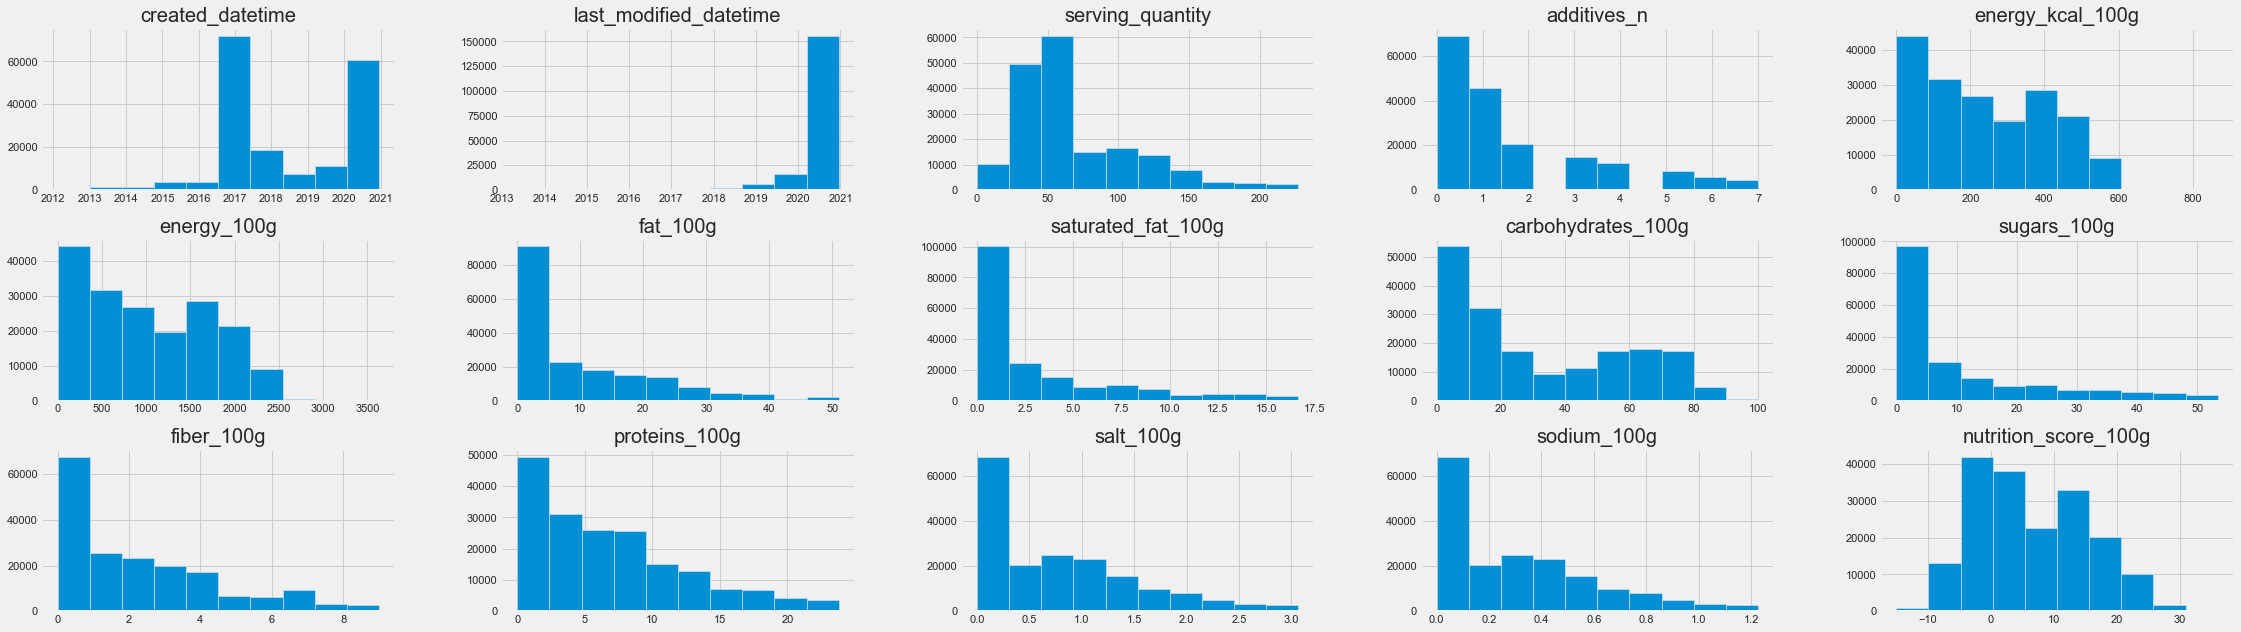

In [7]:
data.hist(figsize=(35,10), layout=(3,5))
plt.show()

## Univariate analyzes

In this section I will independently look at each variable that I find important to realize my application.  
I will especially dissociate the lists contained in some columns in order to locate the most frequent elements

In [8]:
def plot_bar_uni(data, labels, title, size=(10,5), kind='barh'):
    """Display a bar plot for a single column
    args:
        data: pd.Series - data to plot
        labels: list/tuple - x and y labels
        title: str - figure title
        size: tuple - figure size
        kind: str, default='barh' - Plot kind: {'bar', 'barh'}
    """
    data.plot(kind=kind, figsize=size)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.title(title, fontsize=16)
    plt.show()

### Most common additives

Proportion of foods with additives

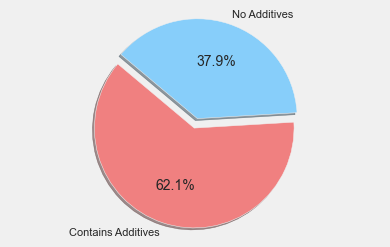

In [9]:
plt.pie(
    [data[data['additives_n'] > 0].shape[0], data[data['additives_n'] == 0].shape[0]],
    explode=(0.1, 0),
    labels=['Contains Additives', 'No Additives'],
    colors=['lightcoral', 'lightskyblue'],
    autopct='%1.1f%%',
    shadow=True,
    startangle=140
)
plt.axis('equal')
plt.show()

In [10]:
# Split additives lists
exp_additives = data['additives_fr'].str.split(',').apply(pd.Series, 1).stack()
exp_additives.index = exp_additives.index.droplevel(-1)
exp_additives.name = 'additives_exp'

# create new df with a row for each additives
data_exp_additives = data.join(exp_additives)
print(f"{data_exp_additives['additives_exp'].nunique()} unique additives")

399 unique additives


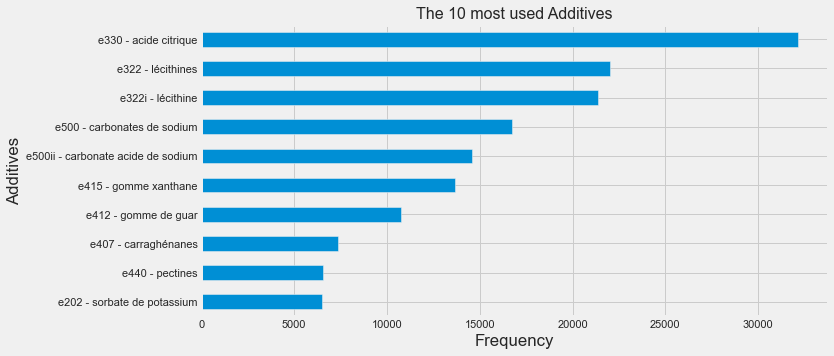

In [11]:
additives_top_10 = data_exp_additives['additives_exp'].value_counts().head(10).sort_values()

plot_bar_uni(additives_top_10, ['Frequency', 'Additives'], 'The 10 most used Additives')

### Most common ingredients

In [12]:
# Split ingredients lists
exp_ingredients = data['ingredients_text'].str.split(',').apply(pd.Series, 1).stack()
exp_ingredients.index = exp_ingredients.index.droplevel(-1)
exp_ingredients.name = 'ingredients_exp'

# create new df with a row for each additives
data_exp_ingredients = data.join(exp_ingredients)
print(f"{data_exp_ingredients['ingredients_exp'].nunique()} unique ingredients")

331360 unique ingredients


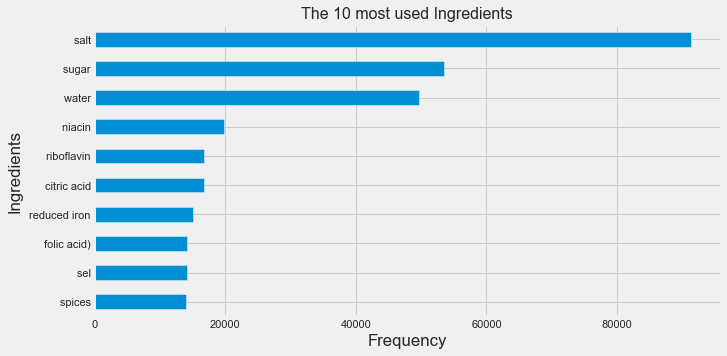

In [13]:
ingredients_top_10 = data_exp_ingredients['ingredients_exp'].value_counts().head(10).sort_values()

plot_bar_uni(ingredients_top_10, ['Frequency', 'Ingredients'], 'The 10 most used Ingredients')

### Most common categories

In [14]:
# Split categories lists
exp_categories = data['categories_fr'].str.split(',').apply(pd.Series, 1).stack()
exp_categories.index = exp_categories.index.droplevel(-1)
exp_categories.name = 'categories_exp'
data_exp_categories = data.join(exp_categories)
print(f"{data_exp_categories['categories_exp'].nunique()} categories")

8694 categories


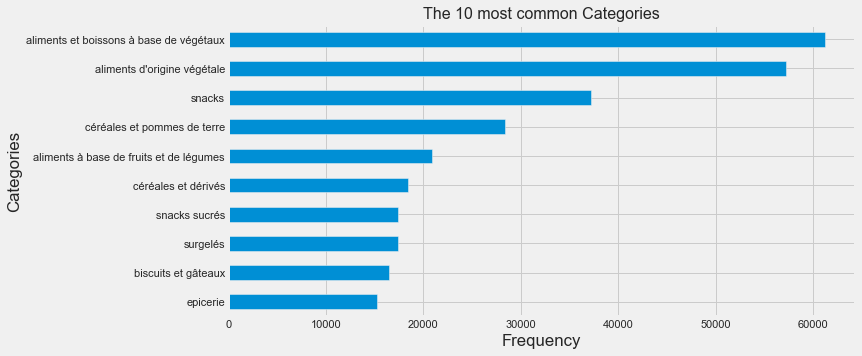

In [15]:
categories_top_10 = data_exp_categories['categories_exp'].value_counts().head(10).sort_values()

plot_bar_uni(categories_top_10, ['Frequency', 'Categories'], 'The 10 most common Categories')

### Most common countries

In [16]:
# Split countries lists
exp_countries = data['countries_fr'].str.split(',').apply(pd.Series, 1).stack()
exp_countries.index = exp_countries.index.droplevel(-1)
exp_countries.name = 'countries_exp'
data_exp_countries = data.join(exp_countries)
print(f"{data_exp_countries['countries_exp'].nunique()} countries")

285 countries


In [17]:
# Excluding Countries that appear less then 10 times in the data
countries_filtered = data_exp_countries.groupby('countries_exp').filter(lambda x: len(x) >= 10)
print(f"{countries_filtered['countries_exp'].nunique()} countries after filtering")

81 countries after filtering


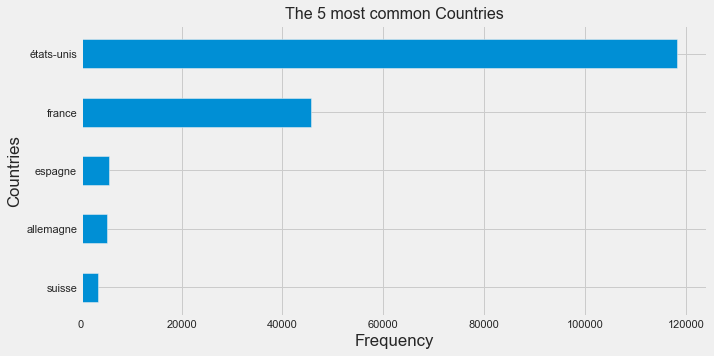

In [18]:
countries_top_5 = countries_filtered['countries_exp'].value_counts().head(5).sort_values()

plot_bar_uni(countries_top_5, ['Frequency', 'Countries'], 'The 5 most common Countries')

In [19]:
print('Products available in France :', data_exp_countries[data_exp_countries['countries_exp']=='france'].shape[0])

Products available in France : 45771


## Bivariate Analyses

In [20]:
def plot_bar_bi(x_val, y_val, x_ticks, labels, title, std=None, size=(10, 5)):
    plt.figure(figsize=size)
    plt.bar(x_val, y_val, yerr=std)
    plt.xlabel(labels[0], fontsize=14)
    plt.ylabel(labels[1], fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks(x_val, x_ticks, rotation=30, horizontalalignment="right")
    plt.show()

### Categories Analysis

In this section, I will analyze the categories of products to identify the most interesting in terms of nutritional intake.  
Then I will identify the most healthy and unhealthy

**Excluding Categories that appear less then 10 times in the data**

In [21]:
categories_filtered = data_exp_categories.groupby('categories_exp').filter(lambda x: len(x) >= 10)
print(f"{categories_filtered['categories_exp'].nunique()} unique categories")

1748 unique categories


In [22]:
# We group the dataframe by their categories
categories_grouped = categories_filtered.groupby('categories_exp')
categories_grouped.describe()

serving_quantity                       \
                                               count   mean    std    min   
categories_exp                                                              
100-legumes                                   22.000 58.000  9.381 56.000   
abats                                        105.000 72.914 33.350 10.000   
abricots                                      15.000 46.133 18.181  0.000   
abricots au sirop                             15.000 59.333  8.805 56.000   
abricots secs                                124.000 52.419 15.644  0.000   
...                                              ...    ...    ...    ...   
œufs de poules                               162.000 57.094 16.268  0.000   
œufs de poules élevées au sol                 18.000 52.222 13.296  0.000   
œufs de poules élevées en cage                20.000 55.380 17.060  0.000   
œufs de poules élevées en plein air           97.000 57.290 14.408  0.000   
œufs frais                                    37.000 54.216  9.724  1.000   

                                                                 additives_n  \
                                       25%    50%    75%     max       count   
categories_exp                                                                 
100-legumes                         56.000 56.000 56.000 100.000      22.000   
abats                               56.000 56.000 80.000 200.000     105.000   
abricots                            40.000 56.000 56.000  80.000      15.000   
abricots au sirop                   56.000 56.000 56.000  82.000      15.000   
abricots secs                       40.000 56.000 56.000 100.000     124.000   
...                                    ...    ...    ...     ...         ...   
œufs de poules                      56.000 56.000 56.000 117.500     162.000   
œufs de poules élevées au sol       56.000 56.000 56.000  60.000      18.000   
œufs de poules élevées en cage      56.000 56.000 56.000 104.000      20.000   
œufs de poules élevées en plein air 56.000 56.000 56.000 116.000      97.000   
œufs frais                          56.000 56.000 56.000  73.000      37.000   

                                                                               \
                                     mean   std   min   25%   50%   75%   max   
categories_exp                                                                  
100-legumes                         0.000 0.000 0.000 0.000 0.000 0.000 0.000   
abats                               0.914 0.921 0.000 0.000 1.000 1.000 5.000   
abricots                            0.800 1.082 0.000 0.000 1.000 1.000 4.000   
abricots au sirop                   0.400 0.632 0.000 0.000 0.000 1.000 2.000   
abricots secs                       0.887 0.735 0.000 0.000 1.000 1.000 3.000   
...                                   ...   ...   ...   ...   ...   ...   ...   
œufs de poules                      0.222 0.546 0.000 0.000 0.000 0.000 5.000   
œufs de poules élevées au sol       0.778 1.166 0.000 0.000 1.000 1.000 5.000   
œufs de poules élevées en cage      0.050 0.224 0.000 0.000 0.000 0.000 1.000   
œufs de poules élevées en plein air 0.155 0.363 0.000 0.000 0.000 0.000 1.000   
œufs frais                          0.432 0.647 0.000 0.000 0.000 1.000 3.000   

                                    energy_kcal_100g                         \
                                               count    mean    std     min   
categories_exp                                                                
100-legumes                                   22.000  38.773 17.029  19.000   
abats                                        105.000 214.763 71.888  24.100   
abricots                                      15.000 192.067 87.076  50.000   
abricots au sirop                             15.000  82.533 54.058  57.000   
abricots secs                                124.000 245.290 50.116   0.000   
...                                              ...     ...    ...  

#### Nutrients intake

**Fat**

In [23]:
fat_top_ten = categories_grouped['fat_100g'].describe().sort_values(by='mean',ascending=False).head(10)
fat_top_ten

count   mean    std    min    25%    50%    75%  \
categories_exp                                                                 
purées de noix de cajou     23.000 48.423  2.355 43.100 47.530 48.900 50.000   
noix de cajou salées        27.000 48.052  1.869 43.000 47.000 48.000 49.700   
noix de cajou grillées      36.000 46.826  4.812 30.700 46.430 48.000 49.700   
taramas                     16.000 46.325  4.017 41.000 42.150 45.650 51.000   
noix de cajou              192.000 44.788  7.462  0.000 43.900 47.000 49.000   
beurres de légumineuses    235.000 44.118 10.214  6.000 46.670 46.880 50.000   
beurres de cacahuètes      235.000 44.118 10.214  6.000 46.670 46.880 50.000   
fruits à coque salés        45.000 43.792  9.996 15.000 45.000 48.000 50.000   
beurres de fruits à coques 287.000 43.459 10.832  1.110 43.775 46.880 50.000   
fruits à coque grillés      83.000 43.422  9.750 11.300 42.860 46.430 50.000   

                              max  
categories_exp                     
purées de noix de cajou    51.000  
noix de cajou salées       51.000  
noix de cajou grillées     51.000  
taramas                    51.000  
noix de cajou              51.000  
beurres de légumineuses    50.500  
beurres de cacahuètes      50.500  
fruits à coque salés       51.000  
beurres de fruits à coques 51.000  
fruits à coque grillés     51.000

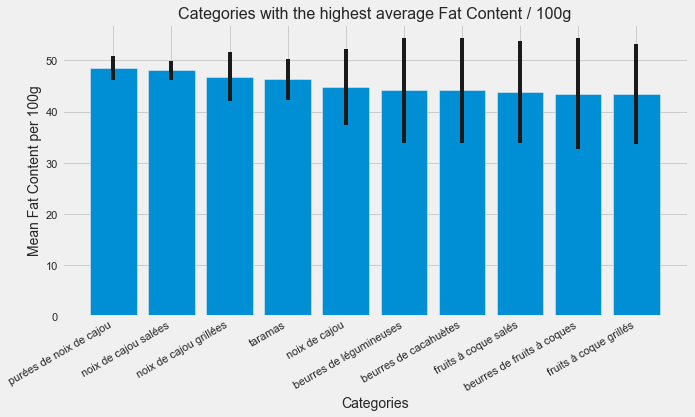

In [24]:
fat_top_ten = categories_grouped['fat_100g'].describe().sort_values(by='mean',ascending=False).head(10)

plot_bar_bi(
    x_val=[i for i, _ in enumerate(fat_top_ten.index)],
    y_val=fat_top_ten['mean'],
    x_ticks=fat_top_ten.index,
    labels=["Categories", "Mean Fat Content per 100g"],
    title="Categories with the highest average Fat Content / 100g",
    std=fat_top_ten['std'],
    size=(10, 5)
)

**Proteins**

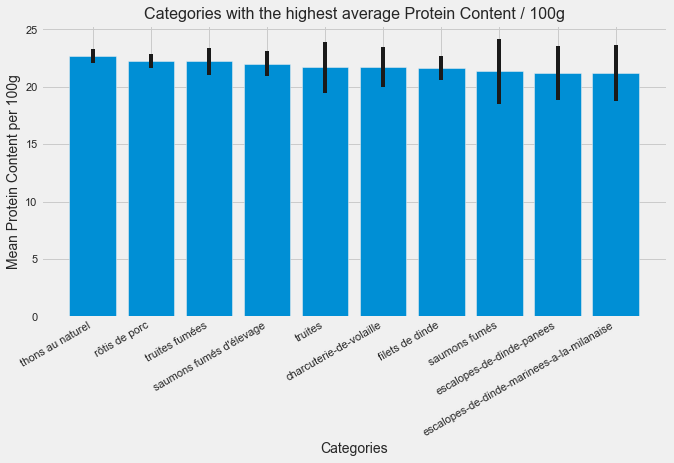

In [25]:
protein_top_ten = categories_grouped['proteins_100g'].describe().sort_values(by='mean',ascending=False).head(10)

plot_bar_bi(
    x_val=[i for i, _ in enumerate(protein_top_ten.index)],
    y_val=protein_top_ten['mean'],
    x_ticks=protein_top_ten.index,
    labels=["Categories", "Mean Protein Content per 100g"],
    title="Categories with the highest average Protein Content / 100g",
    std=protein_top_ten['std'],
    size=(10, 5)
)

**Carbohydrates**

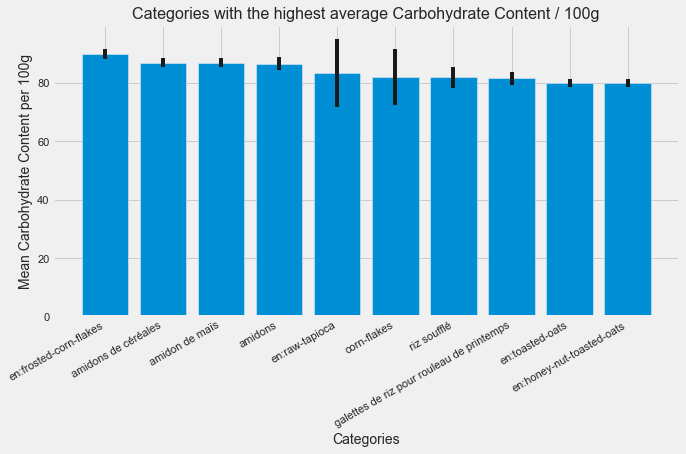

In [26]:
carbs_top_ten = categories_grouped['carbohydrates_100g'].describe().sort_values(by='mean',ascending=False).head(10)

plot_bar_bi(
    x_val=[i for i, _ in enumerate(carbs_top_ten.index)],
    y_val=carbs_top_ten['mean'],
    x_ticks=carbs_top_ten.index,
    labels=["Categories", "Mean Carbohydrate Content per 100g"],
    title="Categories with the highest average Carbohydrate Content / 100g",
    std=carbs_top_ten['std'],
    size=(10, 5)
)

**Sugar**

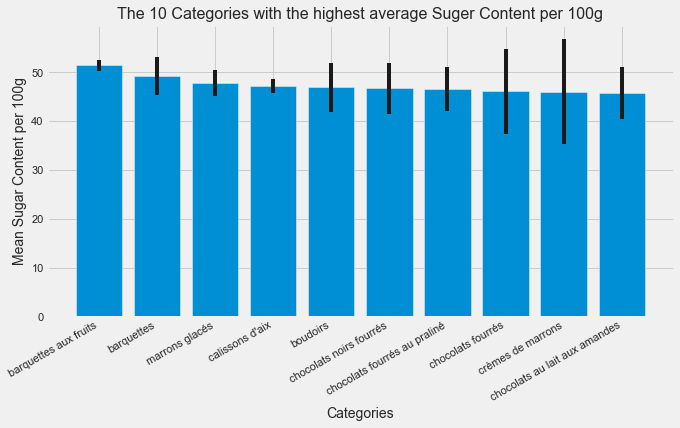

In [27]:
sugar_top_10 = categories_grouped['sugars_100g'].describe().sort_values(by='mean',ascending=False).head(10)

plot_bar_bi(
    x_val=[i for i, _ in enumerate(sugar_top_10.index)],
    y_val=sugar_top_10['mean'],
    x_ticks=sugar_top_10.index,
    labels=["Categories", "Mean Sugar Content per 100g"],
    title="The 10 Categories with the highest average Suger Content per 100g",
    std=sugar_top_10['std'],
    size=(10, 5)
)

#### Healthiest / Unhealthiest Categories

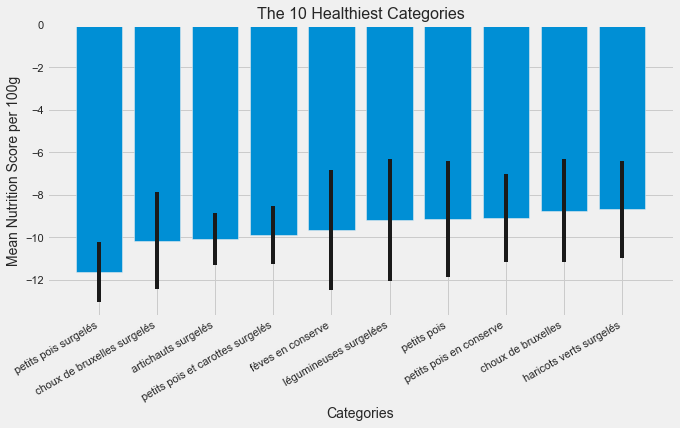

In [28]:
healthy_top_10 = categories_grouped['nutrition_score_100g'].describe().sort_values(by='mean',ascending=True).head(10)
plot_bar_bi(
    x_val=[i for i, _ in enumerate(healthy_top_10.index)],
    y_val=healthy_top_10['mean'],
    x_ticks=healthy_top_10.index,
    labels=["Categories", "Mean Nutrition Score per 100g"],
    title="The 10 Healthiest Categories",
    std=healthy_top_10['std'],
    size=(10, 5)
)

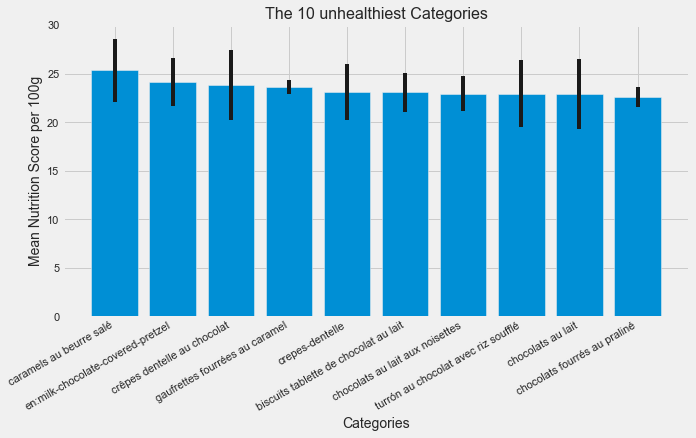

In [29]:
un_healthy_top_10 = categories_grouped['nutrition_score_100g'].describe().sort_values(by='mean',ascending=False).head(10)

plot_bar_bi(
    x_val=[i for i, _ in enumerate(un_healthy_top_10.index)],
    y_val=un_healthy_top_10['mean'],
    x_ticks=un_healthy_top_10.index,
    labels=["Categories", "Mean Nutrition Score per 100g"],
    title="The 10 unhealthiest Categories",
    std=un_healthy_top_10['std'],
    size=(10, 5)
)

### Nutrition Score Analysis

In this section I will use the most common categorical values that I have identified previously to analyze the nutrition score.  
(I use the most common values to be sure I have enough data to be representative)  
Then I will do the comparison with the numeric variables

#### Nutition score by most common additives

In [30]:
print("Most common additives:\n>", '\n> '.join(list(additives_top_10.index[::-1])))

Most common additives:
> e330 - acide citrique
> e322 - lécithines
> e322i - lécithine
> e500 - carbonates de sodium
> e500ii - carbonate acide de sodium
> e415 - gomme xanthane
> e412 - gomme de guar
> e407 - carraghénanes
> e440 - pectines
> e202 - sorbate de potassium


In [31]:
additives_filtered = data_exp_additives[
    (data_exp_additives['additives_exp']=='e330 - acide citrique')|
    (data_exp_additives['additives_exp']=='e322 - lécithines')|
    (data_exp_additives['additives_exp']=='e322i - lécithine')|
    (data_exp_additives['additives_exp']=='e500 - carbonates de sodium')|
    (data_exp_additives['additives_exp']=='e500ii - carbonate acide de sodium')|
    (data_exp_additives['additives_exp']=='e415 - gomme xanthane')|
    (data_exp_additives['additives_exp']=='e412 - gomme de guar')|
    (data_exp_additives['additives_exp']=='e407 - carraghénanes')|
    (data_exp_additives['additives_exp']=='e202 - sorbate de potassium')|
    (data_exp_additives['additives_exp']=='e410 - gomme de caroube')
]

In [32]:
top_additives_grouped = additives_filtered.groupby('additives_exp')
top_additives_grouped['nutrition_score_100g'].describe().sort_values(by='mean',ascending=True)

count   mean   std     min    25%  \
additives_exp                                                              
e330 - acide citrique              32127.000  6.946 7.883 -14.000  1.000   
e410 - gomme de caroube             6412.000  8.209 7.418  -9.000  1.000   
e412 - gomme de guar               10780.000  8.252 6.974 -11.000  2.000   
e407 - carraghénanes                7379.000  8.552 6.894  -9.000  3.000   
e202 - sorbate de potassium         6525.000  8.726 7.730 -10.000  2.000   
e415 - gomme xanthane              13654.000  9.083 7.503 -11.000  2.000   
e500 - carbonates de sodium        16755.000 14.996 7.399 -10.000 11.000   
e322 - lécithines                  21990.000 15.002 8.004  -8.000 10.000   
e322i - lécithine                  21380.000 15.013 8.017  -8.000 10.000   
e500ii - carbonate acide de sodium 14594.000 15.231 7.336 -10.000 11.000   

                                      50%    75%    max  
additives_exp                                            
e330 - acide citrique               6.000 13.000 33.000  
e410 - gomme de caroube             9.000 14.000 30.000  
e412 - gomme de guar                9.000 14.000 34.000  
e407 - carraghénanes                8.000 14.000 36.000  
e202 - sorbate de potassium         8.000 15.000 31.000  
e415 - gomme xanthane              10.000 15.000 33.000  
e500 - carbonates de sodium        16.000 21.000 34.000  
e322 - lécithines                  16.000 21.000 36.000  
e322i - lécithine                  16.000 21.000 36.000  
e500ii - carbonate acide de sodium 16.000 21.000 34.000

<AxesSubplot:title={'center':'Nutrition score for the most common additives'}, xlabel='nutrition_score_100g', ylabel='additives_exp'>

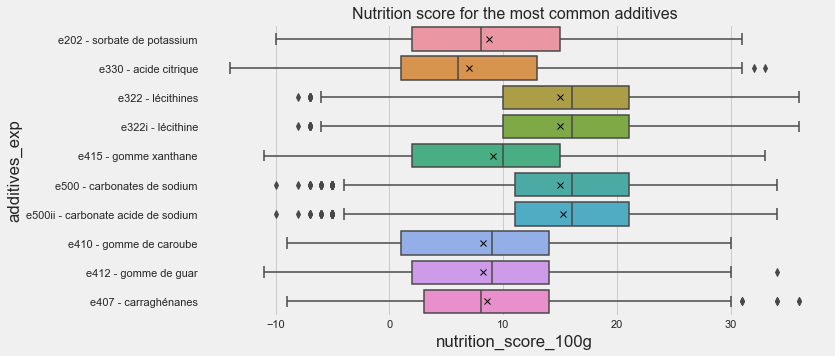

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Nutrition score for the most common additives', fontsize=16)
sns.boxplot(
    x="nutrition_score_100g", y="additives_exp", 
    data=additives_filtered, 
    ax=ax, 
    linewidth=1.5, 
    showmeans=True, 
    meanprops={"marker":"x", "markeredgecolor":"black"}
)

#### Nutrition score by most common ingredients

In [34]:
# focus on the 10 most common ingredients
print("10 most common ingredients:\n>", '\n> '.join(ingredients_top_10.index[::-1]))

10 most common ingredients:
>  salt
>  sugar
>  water
>  niacin
>  riboflavin
>  citric acid
>  reduced iron
>  folic acid)
>  sel
>  spices


In [35]:
ingredients_filtered = data_exp_ingredients[
    (data_exp_ingredients['ingredients_exp']==' salt')|
    (data_exp_ingredients['ingredients_exp']==' sugar')|
    (data_exp_ingredients['ingredients_exp']==' water')|
    (data_exp_ingredients['ingredients_exp']==' niacin')|
    (data_exp_ingredients['ingredients_exp']==' citric acid')|
    (data_exp_ingredients['ingredients_exp']==' riboflavin')|
    (data_exp_ingredients['ingredients_exp']==' reduced iron')|
    (data_exp_ingredients['ingredients_exp']==' folic acid)')|
    (data_exp_ingredients['ingredients_exp']==' spices')|
    (data_exp_ingredients['ingredients_exp']==' dextrose')
]

In [36]:
top_ingredients_grouped = ingredients_filtered.groupby('ingredients_exp')
top_ingredients_grouped['nutrition_score_100g'].describe().sort_values(by='mean',ascending=True)

count   mean   std     min   25%    50%    75%    max
ingredients_exp                                                          
 water          49631.000  6.924 8.181 -14.000 0.000  4.000 13.000 35.000
 citric acid    16724.000  7.772 7.530 -14.000 2.000  7.000 14.000 33.000
 spices         13979.000  8.830 7.236 -10.000 3.000 10.000 14.000 31.000
 salt           91235.000  9.806 7.885 -14.000 3.000 11.000 16.000 36.000
 riboflavin     16796.000  9.866 9.101 -10.000 2.000 11.000 17.000 33.000
 niacin         19885.000 10.435 9.169 -10.000 2.000 11.000 18.000 33.000
 sugar          53555.000 10.636 7.849 -12.000 4.000 12.000 17.000 36.000
 reduced iron   15191.000 11.977 8.457  -7.000 3.000 12.000 19.000 33.000
 folic acid)    14184.000 12.131 8.504  -9.000 4.000 13.000 19.000 33.000
 dextrose       13896.000 12.321 7.529  -9.000 5.000 13.000 18.000 32.000

<AxesSubplot:title={'center':'Nutrition score for the most common ingredients'}, xlabel='nutrition_score_100g', ylabel='ingredients_exp'>

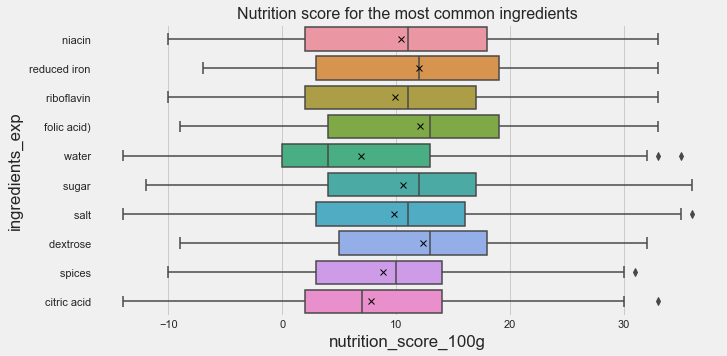

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Nutrition score for the most common ingredients', fontsize=16)
sns.boxplot(
    x="nutrition_score_100g", y="ingredients_exp", 
    data=ingredients_filtered, 
    ax=ax, 
    linewidth=1.5, 
    showmeans=True, 
    meanprops={"marker":"x", "markeredgecolor":"black"}
)

#### Nutrition score by most common categories

In [38]:
# focus on the 10 categories with the most data
print("Top 10 categories:\n>", '\n> '.join(categories_top_10.index[::-1]))

Top 10 categories:
> aliments et boissons à base de végétaux
> aliments d'origine végétale
> snacks
> céréales et pommes de terre
> aliments à base de fruits et de légumes
> céréales et dérivés
> snacks sucrés
> surgelés
> biscuits et gâteaux
> epicerie


In [39]:
categories_filtered = data_exp_categories[
    (data_exp_categories['categories_exp']=='aliments et boissons à base de végétaux')|
    (data_exp_categories['categories_exp']=="aliments d'origine végétale")|
    (data_exp_categories['categories_exp']=='snacks')|
    (data_exp_categories['categories_exp']=='céréales et pommes de terre')|
    (data_exp_categories['categories_exp']=='aliments à base de fruits et de légumes')|
    (data_exp_categories['categories_exp']=='céréales et dérivés')|
    (data_exp_categories['categories_exp']=='surgelés')|
    (data_exp_categories['categories_exp']=='snacks sucrés')|
    (data_exp_categories['categories_exp']=='biscuits et gâteaux')|
    (data_exp_categories['categories_exp']=='epicerie')
]
categories_filtered['categories_exp'].value_counts()

aliments et boissons à base de végétaux    61185
aliments d'origine végétale                57199
snacks                                     37205
céréales et pommes de terre                28338
aliments à base de fruits et de légumes    20851
céréales et dérivés                        18380
snacks sucrés                              17415
surgelés                                   17345
biscuits et gâteaux                        16500
epicerie                                   15224
Name: categories_exp, dtype: int64

In [40]:
top_categories_grouped = categories_filtered.groupby('categories_exp')
top_categories_grouped['nutrition_score_100g'].describe().sort_values(by='mean',ascending=True)

count   mean   std     min    25%  \
categories_exp                                                                  
aliments à base de fruits et de légumes 20851.000 -3.523 4.230 -15.000 -6.000   
aliments d'origine végétale             57199.000  0.225 6.654 -15.000 -4.000   
aliments et boissons à base de végétaux 61185.000  0.624 6.771 -15.000 -4.000   
céréales et dérivés                     18380.000  2.119 7.620 -13.000 -4.000   
céréales et pommes de terre             28338.000  2.488 6.961 -13.000 -3.000   
surgelés                                17345.000  4.821 8.652 -14.000 -2.000   
epicerie                                15224.000  7.748 7.042 -14.000  2.000   
snacks                                  37205.000 14.490 7.115 -11.000 10.000   
biscuits et gâteaux                     16500.000 16.466 6.362  -7.000 12.000   
snacks sucrés                           17415.000 17.178 6.548  -8.000 13.000   

                                           50%    75%    max  
categories_exp                                                
aliments à base de fruits et de légumes -4.000 -2.000 24.000  
aliments d'origine végétale             -2.000  3.000 34.000  
aliments et boissons à base de végétaux -1.000  4.000 34.000  
céréales et dérivés                     -1.000  8.000 34.000  
céréales et pommes de terre              0.000  8.000 34.000  
surgelés                                 4.000 12.000 30.000  
epicerie                                 6.000 14.000 30.000  
snacks                                  14.000 20.000 36.000  
biscuits et gâteaux                     17.000 21.000 33.000  
snacks sucrés                           18.000 22.000 36.000

<AxesSubplot:title={'center':'Nutrition score for the most common categories'}, xlabel='nutrition_score_100g', ylabel='categories_exp'>

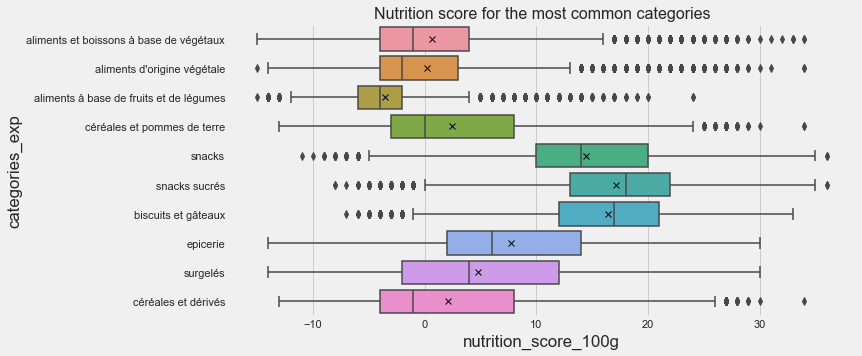

In [41]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Nutrition score for the most common categories', fontsize=16)
sns.boxplot(
    x="nutrition_score_100g",
    y="categories_exp",
    data=categories_filtered,
    ax=ax,
    linewidth=1.5,
    showmeans=True,
    meanprops={"marker":"x", "markeredgecolor":"black"}
)

#### Nutrition score by most common countries

In [42]:
# focus on the 5 countries with the most data
print("Top 5 countries:\n>",'\n> '.join(countries_top_5.index[::-1]))

Top 5 countries:
> états-unis
> france
> espagne
> allemagne
> suisse


In [43]:
countries_filtered = countries_filtered[
    (countries_filtered['countries_exp']=='états-unis')|
    (countries_filtered['countries_exp']=='france')|
    (countries_filtered['countries_exp']=='espagne')|
    (countries_filtered['countries_exp']=='allemagne')|
    (countries_filtered['countries_exp']=='suisse')
]
countries_filtered['countries_exp'].value_counts()

états-unis    118322
france         45771
espagne         5679
allemagne       5268
suisse          3428
Name: countries_exp, dtype: int64

In [44]:
top_countries_grouped = countries_filtered.groupby('countries_exp')
print(top_countries_grouped['nutrition_score_100g'].describe().sort_values(by='mean',ascending=True))

                   count  mean   std     min    25%   50%    75%    max
countries_exp                                                          
suisse          3428.000 4.653 7.884 -14.000 -1.000 3.000 11.000 28.000
allemagne       5268.000 4.691 8.010 -13.000 -2.000 3.000 11.000 30.000
espagne         5679.000 5.163 8.261 -14.000 -1.000 3.000 11.000 29.000
france         45771.000 5.209 8.115 -15.000 -1.000 3.000 11.000 36.000
états-unis    118322.000 7.296 8.920 -14.000  0.000 6.000 14.000 36.000


<AxesSubplot:title={'center':'Nutrition score for the most common countries'}, xlabel='countries_exp', ylabel='nutrition_score_100g'>

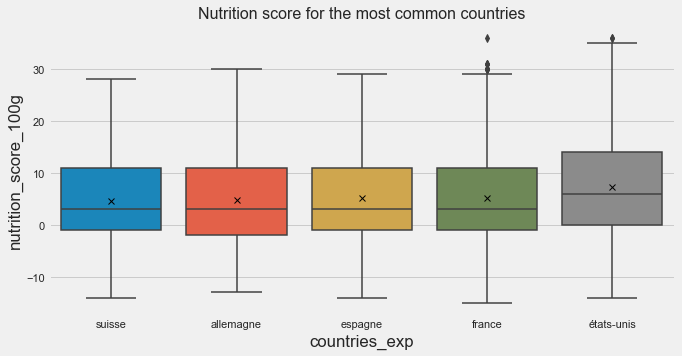

In [45]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Nutrition score for the most common countries', fontsize=16)
sns.boxplot(
    x="countries_exp", y="nutrition_score_100g", 
    data=countries_filtered, 
    ax=ax, 
    linewidth=1.5, 
    showmeans=True, 
    meanprops={"marker":"x", "markeredgecolor":"black"},
    order=['suisse', 'allemagne', 'espagne', 'france', 'états-unis']
)

#### Relationships with other num features

In [46]:
data.select_dtypes(include=float).columns

Index(['serving_quantity', 'additives_n', 'energy_kcal_100g', 'energy_100g',
       'fat_100g', 'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
       'nutrition_score_100g'],
      dtype='object')

In [47]:
data[data.index.duplicated()]

created_datetime last_modified_datetime  \
code                                                     
17400140045 2017-03-09 13:13:47    2020-04-22 18:25:25   
23700014115 2020-04-23 13:18:00    2020-04-23 13:18:01   
23700033673 2017-03-10 10:22:16    2020-04-23 09:25:33   
23700040183 2020-04-23 13:18:00    2020-04-23 13:18:00   
35493012698 2017-03-09 10:48:31    2020-11-14 15:15:31   
35493012711 2017-03-09 10:48:30    2020-04-22 16:44:49   
35493013374 2017-03-09 10:48:32    2020-04-22 16:44:50   
35493013909 2017-03-09 10:48:30    2020-04-22 16:44:48   
64912085425 2018-11-22 17:48:20    2020-02-26 22:51:10   
72101011766 2017-03-10 08:09:29    2020-04-22 23:00:07   

                                       product_name quantity  \
code                                                           
17400140045                       brown & wild rice      NaN   
23700014115                  chicken breast fillets      NaN   
23700033673                   chicken breast strips      NaN   
23700040183  parmesan herb encrusted chicken strips      NaN   
35493012698                                 tilapia      NaN   
35493012711                 applewood smoked salmon      NaN   
35493013374                                  salmon      NaN   
35493013909                       italian pesto cod      NaN   
64912085425       yogourt ferme fraise sans lactose    750 g   
72101011766              salsa, jalapena, extra hot      NaN   

                         brands  \
code                              
17400140045  riviana foods inc.   
23700014115                 NaN   
23700033673               tyson   
23700040183                 NaN   
35493012698    high liner foods   
35493012711    high liner foods   
35493013374    high liner foods   
35493013909    high liner foods   
64912085425      maison riviera   
72101011766         la victoria   

                                                 categories_fr     labels_fr  \
code                                                                           
17400140045                                     plats préparés           NaN   
23700014115                                           surgelés           NaN   
23700033673                                           surgelés           NaN   
23700040183                                           surgelés           NaN   
35493012698  produits de la mer,poissons,surgelés,fruits de...           NaN   
35493012711  produits de la mer,poissons,saumons,poissons f...           NaN   
35493013374          produits de la mer,fruits de mer surgelés           NaN   
35493013909          produits de la mer,fruits de mer surgelés           NaN   
64912085425  produits laitiers,produits fermentés,produits ...  sans lactose   
72101011766                         epicerie,sauces,trempettes           NaN   

            countries_fr                                   ingredients_text  \
code                                                                          
17400140045   états-unis  water, brown rice, wild rice, soybean oil, sal...   
23700014115   états-unis  boneless, skinless chicken breasts with rib me...   
23700033673   états-unis  boneless, skinless chicken breast with rib mea...   
23700040183   états-unis  chicken breast strips with rib meat, wheat flo...   
35493012698   états-unis  ingredients for fish: tilapia, water, palm oil...   
35493012711   états-unis  ingredients for fish: salmon, water, apple jui...   
35493013374   états-unis  salmon, water, vegetable oil (canola, cottonse...   
35493013909   états-unis  cod, water, olive oil, basil, parmesan cheese ...   
64912085425       canada                                                NaN   
72101011766   états-unis  jalapeno peppers, bell peppers, water, onions,...   

                                                  serving_size  \
code                                                             
17400140045                                      1 cup (125 g)   
23700014115         

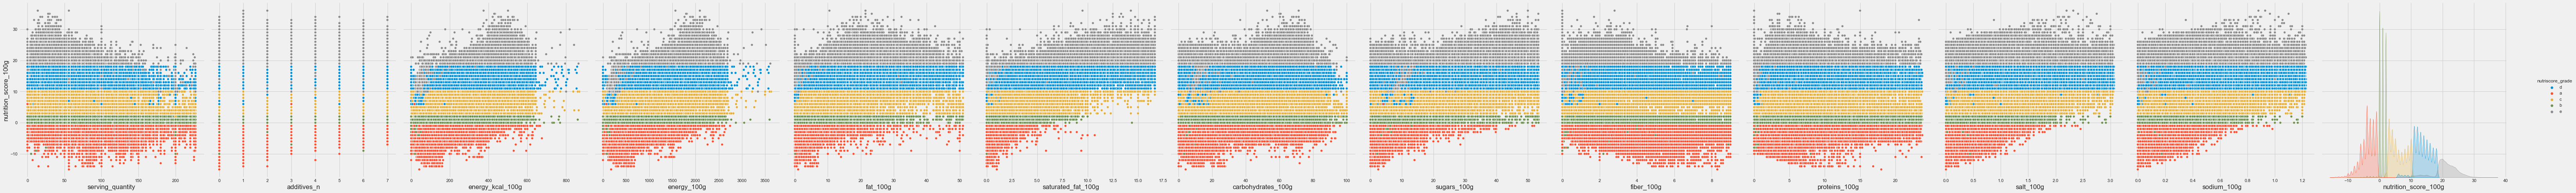

In [48]:
sns.pairplot(
    data.reset_index(),
    height=7,
    hue='nutriscore_grade', 
    x_vars= data.select_dtypes(include=float).columns,
    y_vars=['nutrition_score_100g']
)

### Energy Analysis

In this section I am interested in the columns of energy. First to compare the two dependent columns.  
Then to compare with the most common categorical values and finally with the numerical variables.

#### energy_kcal_100g & energy_100g (kJ)

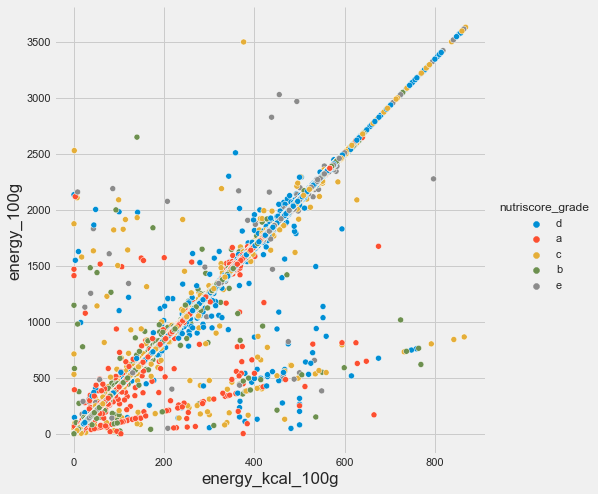

In [49]:
sns.pairplot(
    data,
    height=7,
    hue='nutriscore_grade',
    x_vars= ['energy_kcal_100g'],
    y_vars=['energy_100g'],
)

These two columns describe the same information in different units (kJ and kcal) and are therefore not independent.  
We know that 1kJ = 0.2389kcal
The data should be proportional and end up on the diagonal of the graph, however we see that the data also aligns on a second axis, closer to the kcal axis.
This means that some data has equal value in both columns and the problem may comes from the column in kJ.  
Scattered dots may reflect an error in data entry

In [50]:
# convert value from kJ to kcal where value in kcal is 0
null_kcal_id = data[(data['energy_100g']>0) & (data['energy_kcal_100g']==0)].index
data.loc[null_kcal_id, 'energy_kcal_100g'] = data.loc[null_kcal_id, 'energy_100g'] * 0.2389 

After using the kJ values to assign a kcal value where there was 0 we can delete the column 'energy_100g'

In [51]:
data.drop(columns='energy_100g', inplace=True)

#### Energy by most common ingredients

In [52]:
top_ingredients_grouped['energy_100g'].describe().sort_values(by='mean',ascending=True)

count     mean     std   min      25%      50%      75%  \
ingredients_exp                                                               
 water          49631.000  885.878 504.518 0.000  448.000  895.000 1184.000   
 spices         13979.000  941.661 572.954 0.000  510.000  883.000 1197.000   
 citric acid    16724.000 1041.195 690.839 0.000  406.000  975.000 1590.000   
 salt           91235.000 1126.334 611.083 0.000  640.000 1046.000 1632.000   
 sugar          53555.000 1210.194 634.755 0.000  669.000 1134.000 1795.000   
 dextrose       13896.000 1270.744 567.934 0.000  852.000 1172.000 1778.000   
 riboflavin     16796.000 1413.249 458.155 0.000 1046.000 1477.000 1795.000   
 niacin         19885.000 1461.832 458.376 0.000 1100.000 1494.000 1858.000   
 folic acid)    14184.000 1499.885 465.583 0.000 1100.000 1569.000 1941.000   
 reduced iron   15191.000 1500.765 448.457 0.000 1117.000 1569.000 1925.000   

                     max  
ingredients_exp           
 water          3079.000  
 spices         3289.000  
 citric acid    3423.000  
 salt           3289.000  
 sugar          3230.000  
 dextrose       3519.000  
 riboflavin     3079.000  
 niacin         3079.000  
 folic acid)    3079.000  
 reduced iron   2690.000

<AxesSubplot:xlabel='energy_100g', ylabel='ingredients_exp'>

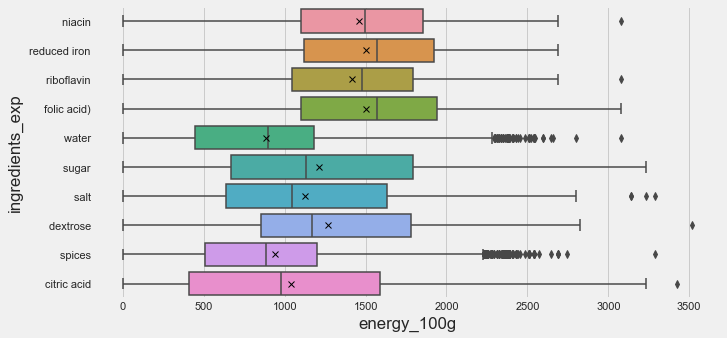

In [53]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(
    x="energy_100g", y="ingredients_exp", 
    data=ingredients_filtered, 
    ax=ax, 
    linewidth=1.5, 
    showmeans=True, 
    meanprops={"marker":"x", "markeredgecolor":"black"}
)

#### Energy by most common categories

In [54]:
top_categories_grouped['energy_100g'].describe().sort_values(by='mean',ascending=True)

count     mean     std   min  \
categories_exp                                                             
aliments à base de fruits et de légumes 20851.000  299.941 310.899 0.000   
epicerie                                15224.000  642.802 542.845 0.000   
surgelés                                17345.000  730.110 374.812 0.000   
aliments et boissons à base de végétaux 61185.000  873.483 665.636 0.000   
aliments d'origine végétale             57199.000  918.911 662.457 0.000   
céréales et pommes de terre             28338.000 1383.790 409.740 0.000   
céréales et dérivés                     18380.000 1446.445 380.867 0.000   
biscuits et gâteaux                     16500.000 1793.703 325.676 0.000   
snacks sucrés                           17415.000 1826.705 358.912 0.000   
snacks                                  37205.000 1851.218 463.310 0.000   

                                             25%      50%      75%      max  
categories_exp                                                               
aliments à base de fruits et de légumes  121.000  209.000  326.000 3598.000  
epicerie                                 226.750  464.000  895.000 3347.000  
surgelés                                 444.000  753.000 1000.000 3297.000  
aliments et boissons à base de végétaux  222.000  818.000 1494.000 3598.000  
aliments d'origine végétale              255.000  954.000 1494.000 3598.000  
céréales et pommes de terre             1117.000 1490.000 1598.000 3598.000  
céréales et dérivés                     1452.000 1506.000 1611.000 3598.000  
biscuits et gâteaux                     1674.000 1866.000 2013.000 3580.000  
snacks sucrés                           1674.000 1912.000 2060.000 3580.000  
snacks                                  1690.000 1954.000 2109.000 3580.000

<AxesSubplot:xlabel='energy_kcal_100g', ylabel='categories_exp'>

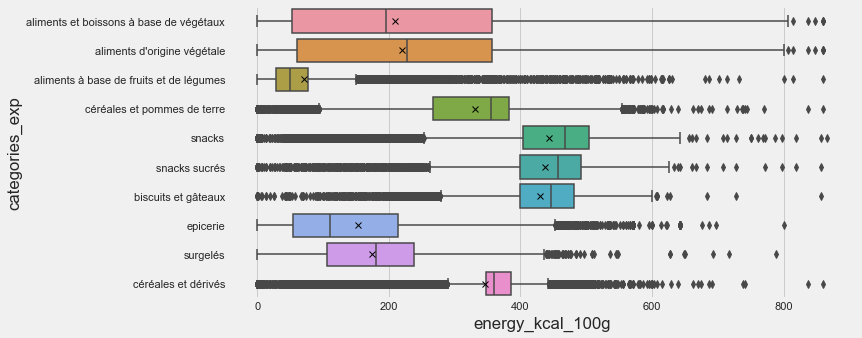

In [55]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(
    x="energy_kcal_100g", y="categories_exp", 
    data=categories_filtered, 
    ax=ax, 
    linewidth=1.5, 
    showmeans=True, 
    meanprops={"marker":"x", "markeredgecolor":"black"}
)

**The energy values are widely dispersed in each category, which will be useful to offer several products according to user needs.**

#### Relationships with other num features

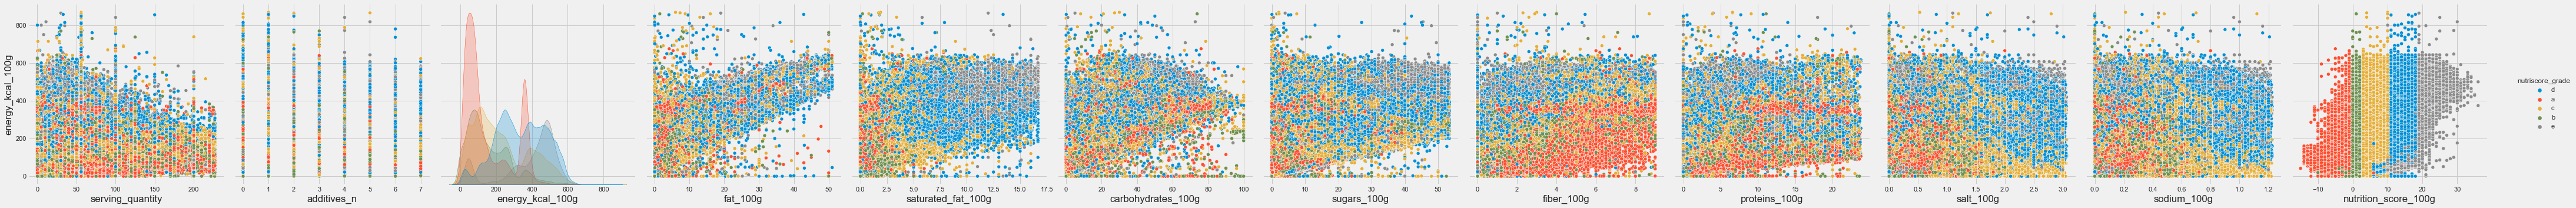

In [57]:
sns.pairplot(
    data.reset_index(),
    height=5,
    hue='nutriscore_grade',
    x_vars= data.select_dtypes(include=float).columns,
    y_vars=['energy_kcal_100g']
)

## Correlations

In [58]:
corr = data.corr(method = "pearson")
corr

serving_quantity  additives_n  energy_kcal_100g  \
serving_quantity                 1.000       -0.038            -0.471   
additives_n                     -0.038        1.000             0.142   
energy_kcal_100g                -0.471        0.142             1.000   
fat_100g                        -0.338        0.132             0.750   
saturated_fat_100g              -0.219        0.206             0.546   
carbohydrates_100g              -0.400        0.113             0.747   
sugars_100g                     -0.241        0.225             0.398   
fiber_100g                      -0.199       -0.135             0.430   
proteins_100g                   -0.088       -0.038             0.364   
salt_100g                       -0.233        0.185             0.212   
sodium_100g                     -0.233        0.185             0.212   
nutrition_score_100g            -0.368        0.340             0.606   

                      fat_100g  saturated_fat_100g  carbohydrates_100g  \
serving_quantity        -0.338              -0.219              -0.400   
additives_n              0.132               0.206               0.113   
energy_kcal_100g         0.750               0.546               0.747   
fat_100g                 1.000               0.727               0.181   
saturated_fat_100g       0.727               1.000               0.131   
carbohydrates_100g       0.181               0.131               1.000   
sugars_100g              0.200               0.327               0.489   
fiber_100g               0.213               0.004               0.443   
proteins_100g            0.309               0.221               0.068   
salt_100g                0.290               0.140              -0.010   
sodium_100g              0.290               0.140              -0.010   
nutrition_score_100g     0.650               0.727               0.318   

                      sugars_100g  fiber_100g  proteins_100g  salt_100g  \
serving_quantity           -0.241      -0.199         -0.088     -0.233   
additives_n                 0.225      -0.135         -0.038      0.185   
energy_kcal_100g            0.398       0.430          0.364      0.212   
fat_100g                    0.200       0.213          0.309      0.290   
saturated_fat_100g          0.327       0.004          0.221      0.140   
carbohydrates_100g          0.489       0.443          0.068     -0.010   
sugars_100g                 1.000       0.109         -0.199     -0.213   
fiber_100g                  0.109       1.000          0.171     -0.024   
proteins_100g              -0.199       0.171          1.000      0.282   
salt_100g                  -0.213      -0.024          0.282      1.000   
sodium_100g                -0.213      -0.024          0.282      1.000   
nutrition_score_100g        0.544      -0.116          0.074      0.419   

                      sodium_100g  nutrition_score_100g  
serving_quantity           -0.233                -0.368  
additives_n                 0.185                 0.340  
energy_kcal_100g            0.212                 0.606  
fat_100g                    0.290                 0.650  
saturated_fat_100g          0.140                 0.727  
carbohydrates_100g         -0.010                 0.318  
sugars_100g                -0.213                 0.544  
fiber_100g                 -0.024                -0.116  
proteins_100g               0.282                 0.074  
salt_100g                   1.000                 0.419  
sodium_100g                 1.000                 0.419  
nutrition_score_100g        0.419                 1.000

C:\Users\Flooow\AppData\Local\Temp/ipykernel_19628/2831363458.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(corr, dtype=np.bool),


<AxesSubplot:>

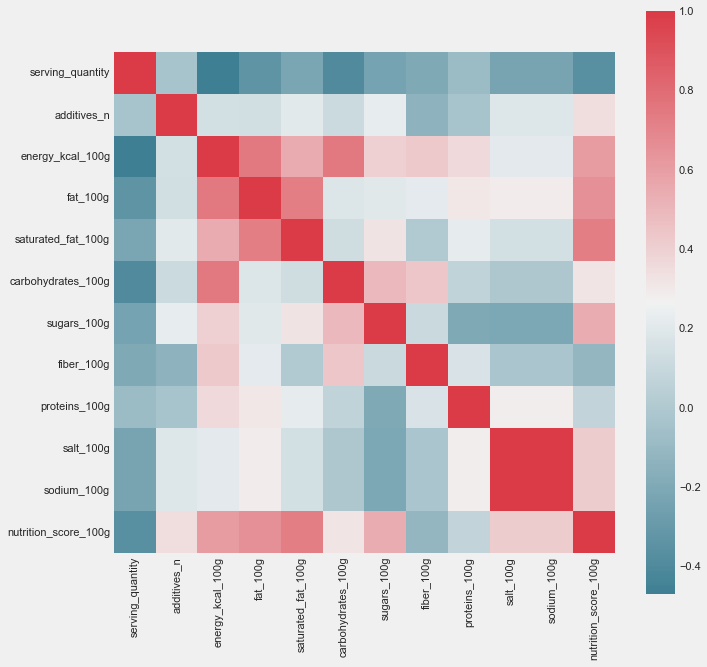

In [59]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    corr,
    mask=np.zeros_like(corr, dtype=np.bool), 
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    square=True, ax=ax
)

In [60]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [61]:
print('The top 10 Correlations between variables are: \n{}'.format(get_top_abs_correlations(data.select_dtypes(include=float), n=10)))

The top 10 Correlations between variables are: 
salt_100g           sodium_100g            1.000
energy_kcal_100g    fat_100g               0.750
                    carbohydrates_100g     0.747
fat_100g            saturated_fat_100g     0.727
saturated_fat_100g  nutrition_score_100g   0.727
fat_100g            nutrition_score_100g   0.650
energy_kcal_100g    nutrition_score_100g   0.606
                    saturated_fat_100g     0.546
sugars_100g         nutrition_score_100g   0.544
carbohydrates_100g  sugars_100g            0.489
dtype: float64


## Statistical Tests

To be able to use parametric tests, my data must validate certain conditions, so I started by performing a normality test

### D'Agostino's K² Normality Test

H0: the sample has a Gaussian distribution.  
H1: the sample does not have a Gaussian distribution.

In [63]:
num_data = data.select_dtypes(include=float)
for col in num_data.columns:
    stat, p = normaltest(data[col])
    #print('K²=%.3f, p=%.3f' % (stat, p))
    if p > 0.01:
        print(f"{col} : K²={stat:.3f}; p={p:.3f} - Not reject H0 : Feature probably Gaussian\n")
    else:
        print(f"{col} : K²={stat:.3f}; p={p:.3f} - Reject H0\n")

serving_quantity : K²=34369.811; p=0.000 - Reject H0

additives_n : K²=29756.381; p=0.000 - Reject H0

energy_kcal_100g : K²=90106.788; p=0.000 - Reject H0

fat_100g : K²=32974.144; p=0.000 - Reject H0

saturated_fat_100g : K²=44517.363; p=0.000 - Reject H0

carbohydrates_100g : K²=178708.017; p=0.000 - Reject H0

sugars_100g : K²=37973.529; p=0.000 - Reject H0

fiber_100g : K²=21032.548; p=0.000 - Reject H0

proteins_100g : K²=17051.089; p=0.000 - Reject H0

salt_100g : K²=17996.433; p=0.000 - Reject H0

sodium_100g : K²=17998.753; p=0.000 - Reject H0

nutrition_score_100g : K²=22073.082; p=0.000 - Reject H0



**As the p-value is lower than the significance level alpha=0.01, we can reject H0 and consider that the columns are not normally distributed**

These features are not normaly distributed and don't have the same variance so I'm gonna use non parametric tests

### Spearman's correlation test

Then I test the dependence between the salt and sodium columns with a Spearman's correlation test

In [64]:
data[['salt_100g', 'sodium_100g']].describe()

salt_100g  sodium_100g
count 181861.000   181861.000
mean       0.779        0.312
std        0.740        0.296
min        0.000        0.000
25%        0.100        0.040
50%        0.640        0.256
75%        1.210        0.484
max        3.067        1.227

array([[<AxesSubplot:title={'center':'salt_100g'}>,
        <AxesSubplot:title={'center':'sodium_100g'}>]], dtype=object)

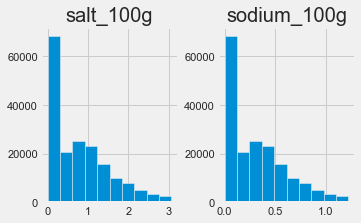

In [65]:
data[['salt_100g', 'sodium_100g']].hist(figsize=(5,3))

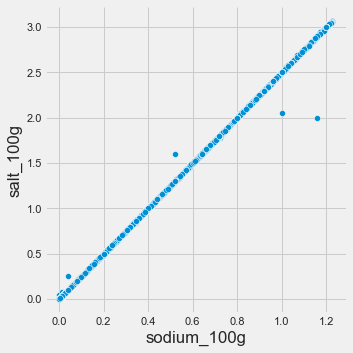

In [66]:
sns.pairplot(
    data,
    height=5,
    x_vars=['sodium_100g'],
    y_vars=['salt_100g']
)

H0: the two features are independent.  
H1: there is a dependency between the features.

In [67]:
stat, p = spearmanr(data['salt_100g'], data['sodium_100g'])
print('r=%.3f, p=%.3f' % (stat, p))
if p > 0.01:
	print('Not reject H0 : Probably independent')
else:
	print('Reject H0 : Probably dependent')

r=1.000, p=0.000
Reject H0 : Probably dependent


**As the p-value is lower than the significance level alpha=0.01, we can reject H0 and consider that 'sodium_100g' and 'salt_100g' are dependant**  

In [68]:
# So we can drop one of these columns.
# data.drop(columns=['sodium_100g'], inplace=True)

### Chi² correlation test

Then I tested the dependence between nutrition_score_100g and nutriscore_grade

In [69]:
# correlation ratio used in ANOVA equivalent to R²
def eta_squared(x,y):
    mean_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'mean_classe': yi_classe.mean()})
    SCT = sum([(yj-mean_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['mean_classe']-mean_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(data['nutriscore_grade'], data['nutrition_score_100g'])

0.9185021326599553

**As the correlation ratio eta² is close to 1 we can assume there is a high correlation between these features**

H0: the two samples are independent.  
H1: there is a dependency between the samples

In [70]:
cont = data[['nutrition_score_100g', 'nutriscore_grade']].pivot_table(index='nutrition_score_100g', columns="nutriscore_grade", aggfunc=len).fillna(0).copy().astype(int)
cont.head(10)

nutriscore_grade         a   b  c  d  e
nutrition_score_100g                   
-15.000                  1   0  0  0  0
-14.000                 49   0  0  0  0
-13.000                100   0  0  0  0
-12.000                112   0  0  0  0
-11.000                185   0  0  0  0
-10.000                507  11  0  0  0
-9.000                 770   3  0  0  0
-8.000                1441   7  0  0  0
-7.000                1992   4  0  0  0
-6.000                4179  19  0  0  0

In [71]:
stat, p, dof, expected = chi2_contingency(cont)
print('chi²=%.3f, p=%.3f' % (stat, p))
if p > 0.01:
	print('Probably independent')
else:
	print('Probably dependent')

chi²=674178.626, p=0.000
Probably dependent


**As the p-value is lower than the significance level alpha=0.01, we can reject H0 and consider that 'nutrition_score_100g' and 'nutriscore_grade' are dependant**  

### Kruskal-Wallis H Test

As I decided to accept their dependence, I then looked at the values of the nutriscore for each grade in order to check if they are indeed an aggregation of the values of the nutriscore

In [72]:
stat, p = kruskal(
    data['nutrition_score_100g'][data['nutriscore_grade']=='a'],
    data['nutrition_score_100g'][data['nutriscore_grade']=='b'],
    data['nutrition_score_100g'][data['nutriscore_grade']=='a'],
    data['nutrition_score_100g'][data['nutriscore_grade']=='d'],
    data['nutrition_score_100g'][data['nutriscore_grade']=='e']
)
print('H=%.3f, p=%.3f' % (stat, p))
if p > 0.01:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

H=158909.653, p=0.000
Probably different distributions


**As the p-value is lower than the significance level alpha=0.01, we can reject H0 and consider there is a statistically significant difference between the groups**

The grades are quite distinct, so I can use it as a dependency variable to predict in possible classification machine learning models

## PCA

In [73]:
num_data = data.select_dtypes(include=float)
# feature scaling : standardisation
std_scale = preprocessing.StandardScaler().fit(num_data)
X_scaled = std_scale.transform(num_data)

In [74]:
# Number of components to keep 
n_components = min(num_data.shape[0], num_data.shape[1])

In [75]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_components)
X_projected = pca.fit_transform(X_scaled)

In [76]:
# explained variance for each component
print(pca.explained_variance_ratio_)
# total
print('{:.2f}'.format(pca.explained_variance_ratio_.sum()))

[3.50977341e-01 1.87451484e-01 1.34078175e-01 9.91410007e-02
 6.95164712e-02 5.16821036e-02 4.72955469e-02 3.21430564e-02
 1.95966311e-02 6.52108128e-03 1.59662978e-03 4.79146882e-07]
1.00


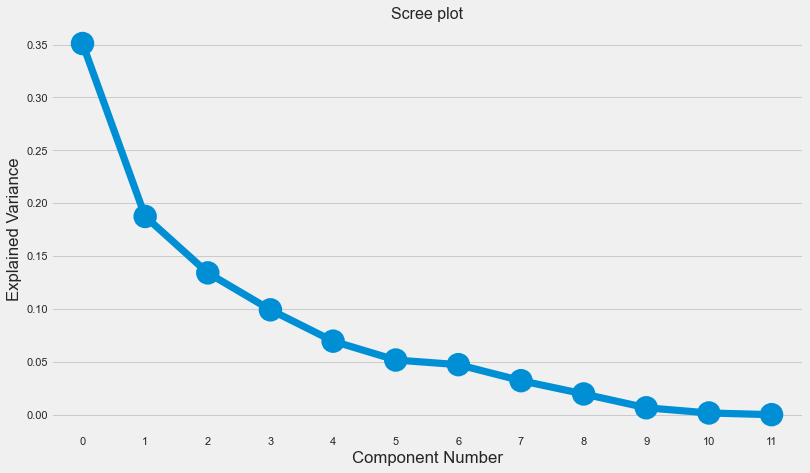

In [77]:
# Scree plot
ind = np.arange(0, n_components)
(fig, ax) = plt.subplots(figsize=(12,7))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot', fontsize=16)
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

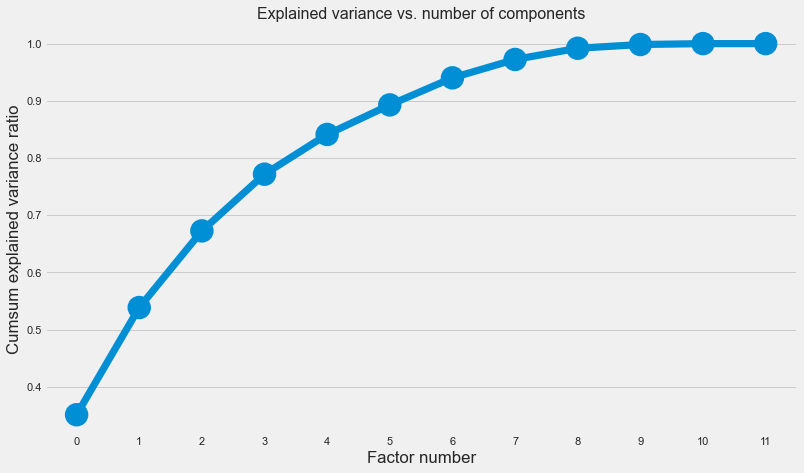

In [78]:
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(np.arange(0, n_components), pca.explained_variance_ratio_.cumsum())
sns.pointplot(x=ind, y=pca.explained_variance_ratio_.cumsum())
ax.set_xticks(ind)
ax.set_xticklabels(ind)
plt.title("Explained variance vs. number of components", fontsize=16)
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

We can reduce the dataset to 5 features which explain 90% of the variance of the data

### Projections on the first factorial plane

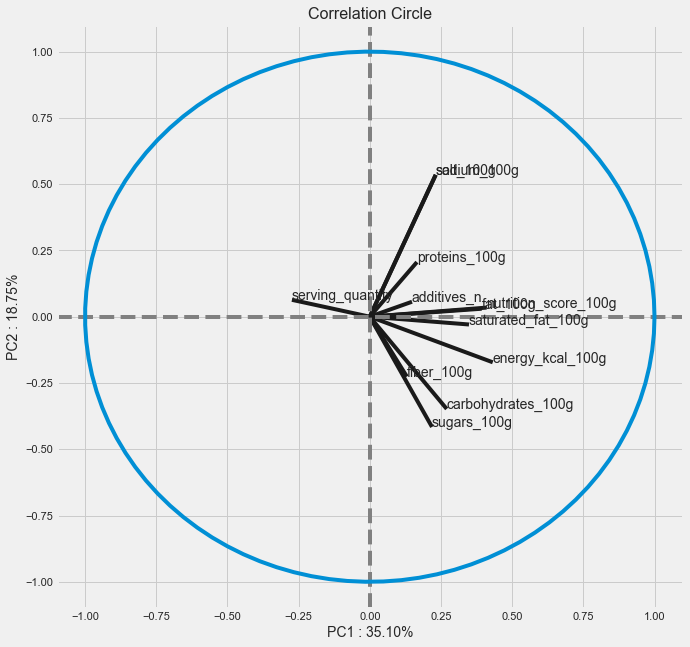

In [79]:
# Correlation circle
pcs = pca.components_
plt.figure(figsize=(10,10))
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, num_data.columns[i], fontsize='14')
x_lim = 1.1
y_lim = 1.1
plt.plot([-x_lim, x_lim], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-y_lim, y_lim], color='grey', ls='--')
# Add a unit circle for scale
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  
plt.xlim([-x_lim, x_lim])
plt.ylim([-y_lim, y_lim])
plt.xlabel("PC1 : {:.2f}%".format(pca.explained_variance_ratio_[0]*100), fontsize=14)
plt.ylabel("PC2 : {:.2f}%".format(pca.explained_variance_ratio_[1]*100), fontsize=14)
plt.title('Correlation Circle', fontsize=16)
plt.show()

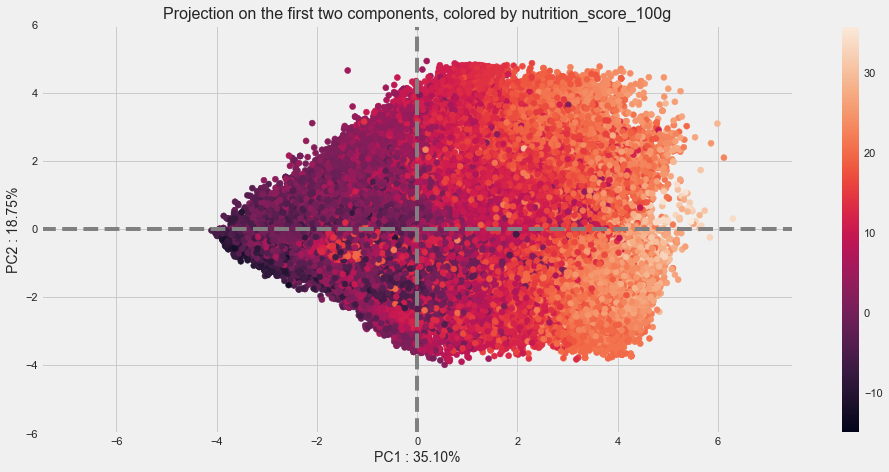

In [80]:
# data projection on the first two components colored by nutrition_score_100g
plt.figure(figsize=(15,7))
plt.scatter(X_projected[:, 0], X_projected[:, 1],
    c=data.get('nutrition_score_100g'))
x_lim = 7.5
y_lim = 6
plt.plot([-x_lim, x_lim], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-y_lim, y_lim], color='grey', ls='--')
plt.xlim([-x_lim, x_lim])
plt.ylim([-y_lim, y_lim])
plt.xlabel("PC1 : {:.2f}%".format(pca.explained_variance_ratio_[0]*100), fontsize=14)
plt.ylabel("PC2 : {:.2f}%".format(pca.explained_variance_ratio_[1]*100), fontsize=14)
plt.title('Projection on the first two components, colored by nutrition_score_100g', fontsize=16)
plt.colorbar()

### Projections on the 2nd factorial plane

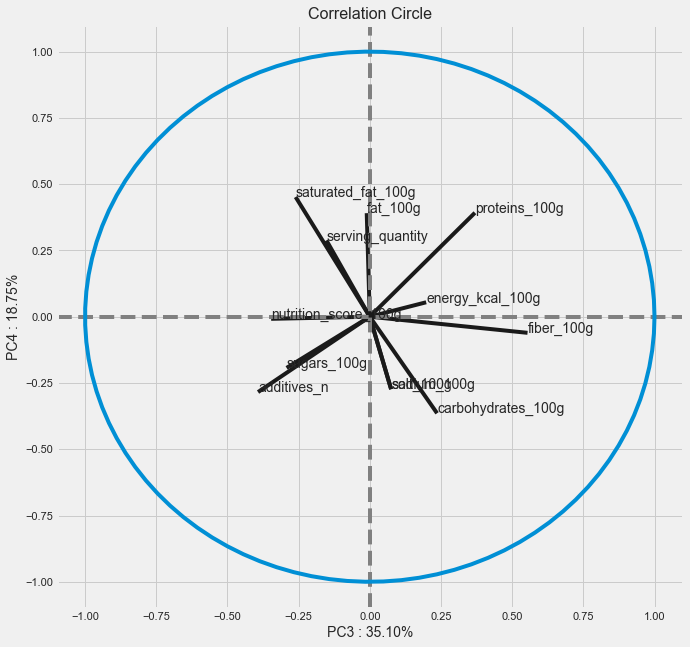

In [81]:
# Correlation circle
pcs = pca.components_
plt.figure(figsize=(10,10))
for i, (x, y) in enumerate(zip(pcs[2, :], pcs[3, :])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, num_data.columns[i], fontsize='14')

x_lim = 1.1
y_lim = 1.1
plt.plot([-x_lim, x_lim], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-y_lim, y_lim], color='grey', ls='--')
# Add a unit circle for scale
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  
plt.xlim([-x_lim, x_lim])
plt.ylim([-y_lim, y_lim])
plt.xlabel("PC3 : {:.2f}%".format(pca.explained_variance_ratio_[0]*100), fontsize=14)
plt.ylabel("PC4 : {:.2f}%".format(pca.explained_variance_ratio_[1]*100), fontsize=14)
plt.title('Correlation Circle', fontsize=16)
plt.show()

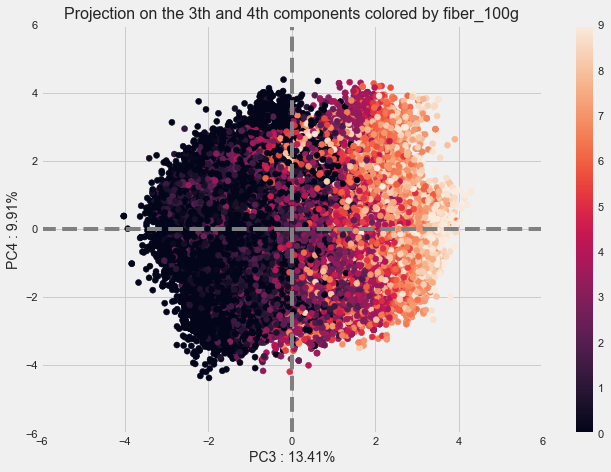

In [82]:
# data projection on the 3th and 4th components colored by nutrition_score_100g
plt.figure(figsize=(10,7))
plt.scatter(X_projected[:, 2], X_projected[:, 3],
    c=data.get('fiber_100g'))
x_lim = 6
y_lim = 6
plt.plot([-x_lim, x_lim], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-y_lim, y_lim], color='grey', ls='--')
plt.xlim([-x_lim, x_lim])
plt.ylim([-y_lim, y_lim])
plt.xlabel("PC3 : {:.2f}%".format(pca.explained_variance_ratio_[2]*100), fontsize=14)
plt.ylabel("PC4 : {:.2f}%".format(pca.explained_variance_ratio_[3]*100), fontsize=14)
plt.title('Projection on the 3th and 4th components colored by fiber_100g', fontsize=16)
plt.colorbar()